# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df["Diff"] = df["Adj Close"].diff().shift(-1)
df["Target"] = np.sign(df["Diff"])
df["Premium"] = 0.08*df["Adj Close"]

In [4]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296,-1.0,0.009431
1981-01-31 00:00:00-05:00,0.097591,-0.006045,-1.0,0.007807
1981-02-28 00:00:00-05:00,0.091546,-0.006909,-1.0,0.007324
1981-03-31 00:00:00-05:00,0.084637,0.013386,1.0,0.006771
1981-04-30 00:00:00-04:00,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [8]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [9]:
df["Predictions"] = y_pred

In [10]:
df["Profits"] = 0

In [11]:
#True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1),"Profits"] = df["Premium"]

In [12]:
#False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1),"Profits"] = 100*df["Diff"] + df["Premium"]

# 5.) Plot profits over time

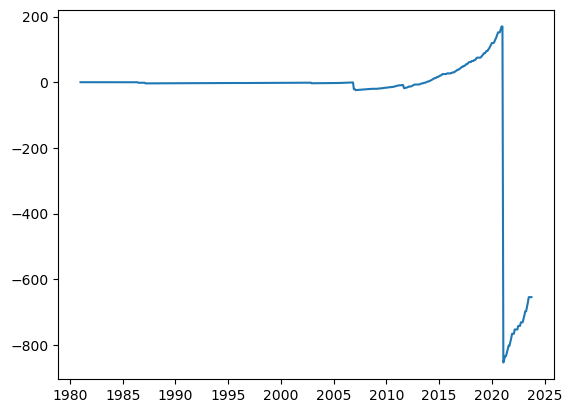

In [13]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

## Q5.5 Skills from the MQE valuable to Philip Liu

In the recent session, Philip mentioned about the significance of cryptocurrency in today's financial landscape. The skills from the MQE program to be immensely valuable in the context of cryptocurrency. Cryptocurrency markets operate 24/7, which means they are subject to constant fluctuations. This is where machine learning skills become very important. For instance, with the help of machine learning algorithms, one can develop automated trading systems that can react swiftly to cryptocurrency price movements. Moreover, as a developer with machine learning skills, it is essential to gain a deeper understanding of cryptocurrency markets. Machine learning can be used to analyze vast amounts of historical and real-time data, allowing for the identification of trends, patterns, and anomalies in the market. 